<a href="https://colab.research.google.com/github/khushi-analytics/telco-churn/blob/main/telco_churn_logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# 2. Load Data
url = "https://raw.githubusercontent.com/khushi-analytics/telco-churn/main/Telco-Customer-Churn.csv"
df = pd.read_csv(url)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# 3. Data Overview
print("Shape:", df.shape)
print("Missing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)

Shape: (7043, 21)
Missing values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Data types:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object


In [4]:
# 4. Clean Data
# Remove empty total charges (non-numeric strings)
df = df[df['TotalCharges'] != " "].copy()
df['TotalCharges'] = df['TotalCharges'].astype(float)

# Drop customer ID
df.drop(columns=['customerID'], inplace=True)

# Encode target
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == "Yes" else 0)

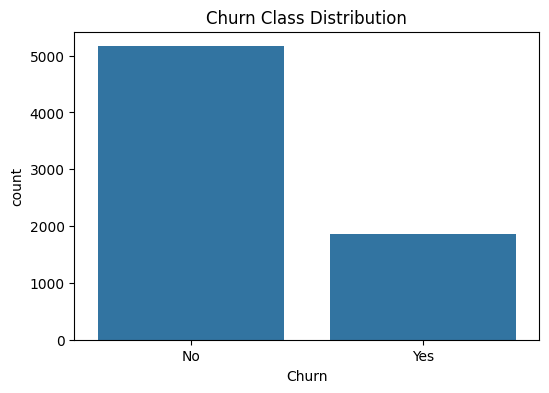

In [5]:
## 5. Exploratory Data Analysis & Stakeholder Insights

# Churn Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title("Churn Class Distribution")
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

In [6]:
churn_rate = df['Churn'].mean()
print(f"Overall Churn Rate: {churn_rate:.2%}")

Overall Churn Rate: 26.58%


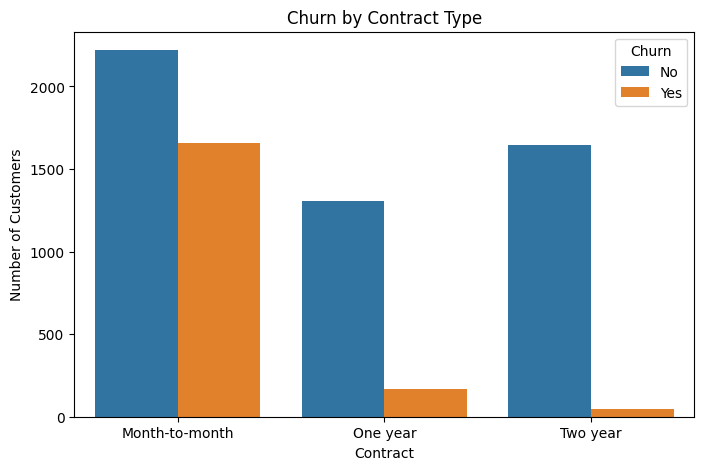

In [7]:
# Contract Type Analysis
plt.figure(figsize=(8,5))
sns.countplot(x='Contract', hue='Churn', data=pd.read_csv(url))
plt.title("Churn by Contract Type")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.legend(title="Churn")
plt.show()

<ipython-input-8-226914401>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.barplot(x='InternetService', y='Churn', data=pd.read_csv(url).replace({'Yes': 1, 'No': 0}))


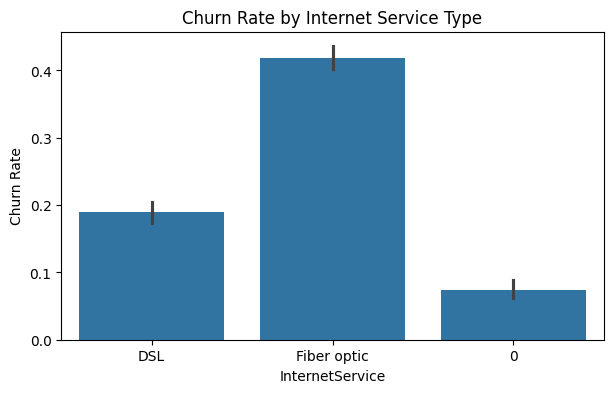

In [8]:
# Internet Service vs. Churn
plt.figure(figsize=(7,4))
sns.barplot(x='InternetService', y='Churn', data=pd.read_csv(url).replace({'Yes': 1, 'No': 0}))
plt.title("Churn Rate by Internet Service Type")
plt.ylabel("Churn Rate")
plt.show()

<ipython-input-9-104884889>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sns.barplot(x='PaymentMethod', y='Churn', data=pd.read_csv(url).replace({'Yes': 1, 'No': 0}))


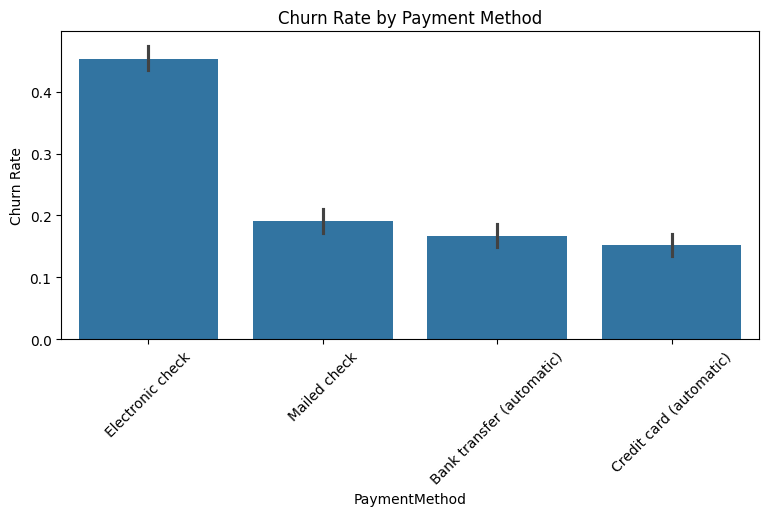

In [9]:
# Payment Method vs. Churn
plt.figure(figsize=(9,4))
sns.barplot(x='PaymentMethod', y='Churn', data=pd.read_csv(url).replace({'Yes': 1, 'No': 0}))
plt.xticks(rotation=45)
plt.title("Churn Rate by Payment Method")
plt.ylabel("Churn Rate")
plt.show()

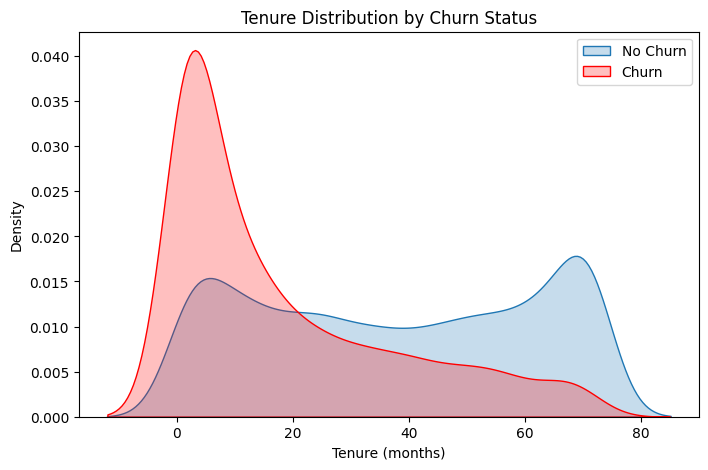

In [10]:
# Tenure vs Churn: Distribution
plt.figure(figsize=(8,5))
sns.kdeplot(data=df[df['Churn'] == 0], x='tenure', label='No Churn', fill=True)
sns.kdeplot(data=df[df['Churn'] == 1], x='tenure', label='Churn', fill=True, color='red')
plt.title("Tenure Distribution by Churn Status")
plt.xlabel("Tenure (months)")
plt.ylabel("Density")
plt.legend()
plt.show()

In [11]:
# Summary
print("""
📈 Insights: What Drives Churn?

1. 📉 Contract Type:
   - Month-to-month customers have significantly higher churn rates.
   - Recommendation: Offer loyalty discounts to encourage longer-term contracts.

2. 🌐 Internet Service:
   - Fiber Optic internet users show higher churn risk than DSL or None.
   - Suggest investigating cost or reliability of Fiber plans.

3. 💳 Payment Method:
   - Electronic Check users have higher churn rates.
   - Promote stable payment methods like bank transfer or card auto-pay.

4. 🕰️ Tenure:
   - Short-tenure customers are more likely to churn — early engagement matters.

""")


📈 Insights: What Drives Churn?

1. 📉 Contract Type:
   - Month-to-month customers have significantly higher churn rates.
   - Recommendation: Offer loyalty discounts to encourage longer-term contracts.

2. 🌐 Internet Service:
   - Fiber Optic internet users show higher churn risk than DSL or None.
   - Suggest investigating cost or reliability of Fiber plans.

3. 💳 Payment Method:
   - Electronic Check users have higher churn rates.
   - Promote stable payment methods like bank transfer or card auto-pay.

4. 🕰️ Tenure:
   - Short-tenure customers are more likely to churn — early engagement matters.




In [12]:
# 6. Encode Categorical Variables
categorical_cols = df.select_dtypes(include='object').columns.tolist()
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [13]:
# Scale Numeric Features
scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [14]:
# 7. Split Data
X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# 8. Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



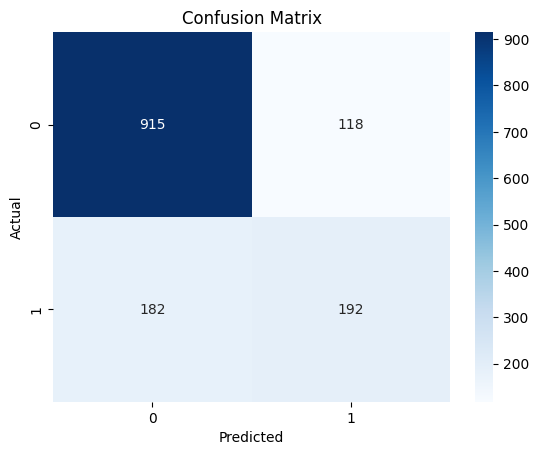

In [16]:
# 9. Evaluation
y_pred = lr.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [17]:
## 10. Conclusion
print("""
✅ Logistic regression built a strong baseline churn classifier.
✅ Useful stakeholder insights uncovered on contract type, internet plans, and tenure.
✅ Dataset is ready for deeper models and deployment.
""")


✅ Logistic regression built a strong baseline churn classifier.
✅ Useful stakeholder insights uncovered on contract type, internet plans, and tenure.
✅ Dataset is ready for deeper models and deployment.

